In [1]:
##import libraries
!pip install tqdm
from tqdm import tqdm
import gym
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="`np.bool8` is a deprecated alias for `np.bool_`")


In [2]:
env=gym.make('Taxi-v3')

In [3]:
env.reset()##only [0] gives the state so we assign Q(s,a) the s here as env.reset()[0]

(307, {'prob': 1.0, 'action_mask': array([1, 1, 0, 0, 0, 0], dtype=int8)})

In [4]:
####define all functions-gen_episode,take_action,q_learn,monte_carlo and update as per
q_table_ql=defaultdict(lambda:np.zeros(6))
q_table_mc=defaultdict(lambda:np.zeros(6))###becase theres 500 possible states a key of that state will be created as when encountered
#q table has state as the key, q_table[state] gives a list with index as action value and its value i.e q_table[state][action=index]=q(s,a) value

In [5]:
def take_action(state,q_table):
    if random.random()<epsilon:###greedy algo to take action
        action=env.action_space.sample()
    else:
        action=np.argmax(q_table[state])###since index is the action
    return action
        

In [6]:
def gen_episode_ql(q_table):
    episode_reward=0
    done=False
    state=env.reset()[0]
    while not done:###timestep updation required for q-learning
        action=take_action(state,q_table)
        next_state,reward,done,_,_=env.step(action)
        q_table[state][action]+=alpha*(reward+max(q_table[next_state])*gamma-q_table[state][action])##update for q_learning
        state=next_state
        episode_reward+=reward
    #epsilon = max(min_epsilon, epsilon * epsilon_decay)
    return episode_reward
        

In [7]:
def gen_episode_mc(q_table):
    episode_data=[]
    states=[]
    rewards=[]
    actions=[]
    episode_reward_mc=0
    done=False
    state=env.reset()[0]
    while not done:###timestep updation required for q-learning
        action=take_action(state,q_table)
        next_state,reward,done,_,_=env.step(action)
        #episode_data.append((state,action,reward))
        states.append(state)
        rewards.append(reward)
        actions.append(action)
        state=next_state
        episode_reward_mc+=reward
    #epsilon = max(min_epsilon, epsilon * epsilon_decay)
    return states,rewards,actions,episode_reward_mc
        
        

In [8]:
##def update_monte(q_table):
    


In [ ]:
###function to get all
from tqdm import tqdm
q_table_ql=defaultdict(lambda:np.zeros(6))
q_table_mc=defaultdict(lambda:np.zeros(6))
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
epsilon_decay = 0.99
min_epsilon = 0.01
episode_data=[]
#episodes = 1000
done=False
x_episodes=[]
reward_after_each_episode_ql=[]
reward_after_each_episode_mc=[]
episodes=500
for episode in tqdm(range(1,episodes+1),desc="Q Learning"):
    #state=env.reset()[0]
    x_episodes.append(episode)
    reward_after_each_episode_ql.append(gen_episode_ql(q_table_ql))
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
epsilon=0.1
for episode in tqdm(range(1, episodes + 1), desc="Monte Carlo"):
    states,rewards,actions, total_reward = gen_episode_mc(q_table_mc)
    reward_after_each_episode_mc.append(total_reward)
    G = 0
    for state, action, reward in states, actions,rewards:
        G = gamma * G + reward
        q_table_mc[state][action] += alpha * (G - q_table_mc[state][action])
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
#print(reward_after_each_episode_ql,reward_after_each_episode_mc)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x_episodes,reward_after_each_episode_ql)
plt.plot(x_episodes,reward_after_each_episode_mc)
plt.legend(['Q-Learning','Monte Carlo'])
    

Monte Carlo:   0%|          | 0/500 [00:00<?, ?it/s]

Q Learning: 100%|██████████| 500/500 [00:01<00:00, 309.43it/s]


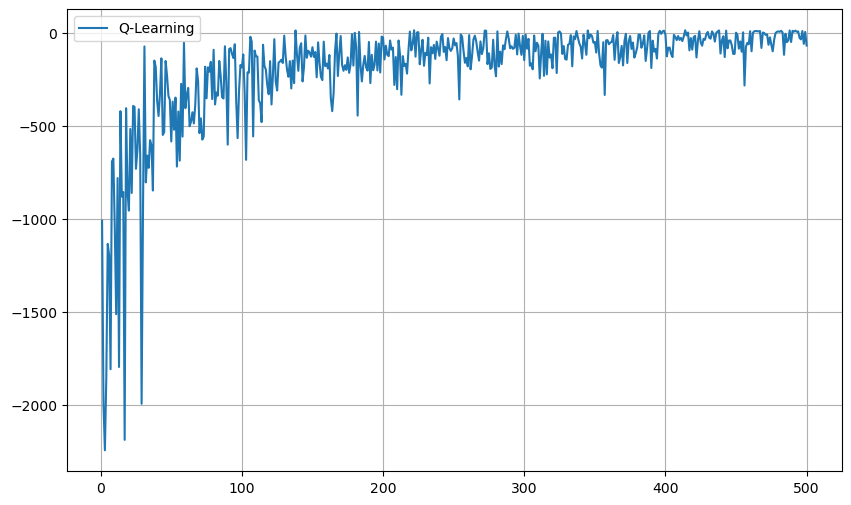

In [9]:
###function to get all
from tqdm import tqdm
q_table_ql=defaultdict(lambda:np.zeros(6))
q_table_mc=defaultdict(lambda:np.zeros(6))
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
epsilon_decay = 0.99
min_epsilon = 0.01
episode_data=[]
#episodes = 1000
done=False
x_episodes=[]
reward_after_each_episode_ql=[]
reward_after_each_episode_mc=[]
episodes=500
for episode in tqdm(range(1,episodes+1),desc="Q Learning"):
    #state=env.reset()[0]
    x_episodes.append(episode)
    reward_after_each_episode_ql.append(gen_episode_ql(q_table_ql))
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
epsilon=0.1

#print(reward_after_each_episode_ql,reward_after_each_episode_mc)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x_episodes,reward_after_each_episode_ql)
#plt.plot(x_episodes,reward_after_each_episode_mc)
plt.legend(['Q-Learning','Monte Carlo'])
    

In [ ]:
##trial-so even that updation happens in function for a global variable tho it may not return it 
p=[]
h=1
def gen(h):
    for i in range(5):
        h=h+1
        p.append(h)
    return(h)
print(gen(h))
print(p)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="`np.bool8` is a deprecated alias for `np.bool_`")

import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize environment
env = gym.make('Taxi-v3')

# Parameters
alpha = 0.1          # Learning rate
gamma = 0.99         # Discount factor
epsilon = 0.1        # Exploration rate
epsilon_decay = 0.99 # Decay rate for epsilon
min_epsilon = 0.01   # Minimum epsilon value
episodes = 1000      # Number of episodes for training
num_states = 500     # Number of states (adjust as needed)

# Initialize Q-table as a dictionary of NumPy arrays
q_table = {i: np.zeros(env.action_space.n) for i in range(num_states)}

# Lists to store results for plotting
x_episodes = []
reward_after_each_episode = []

# Function to choose action based on epsilon-greedy policy
def take_action(state, q_table, epsilon):
    if random.random() < epsilon:
        return env.action_space.sample()  # Explore: choose random action
    else:
        return np.argmax(q_table[state])  # Exploit: choose action with highest Q-value

# Training loop for Monte Carlo
def train_monte_carlo(alpha, gamma, epsilon):
    q_table = defaultdict(lambda: np.zeros(env.action_space.n))
    cumulative_rewards = []

    for episode in range(episodes):
        state = env.reset()[0]
        episode_data = []
        total_reward = 0
        done = False

        while not done:
            action = take_action(state, q_table, epsilon)
            next_state, reward, done, _ ,_= env.step(action)
            episode_data.append((state, action, reward))
            total_reward += reward
            state = next_state

        # Monte Carlo update
        G = 0
        for state, action, reward in reversed(episode_data):
            G = gamma * G + reward
            q_table[state][action] += alpha * (G - q_table[state][action])

        cumulative_rewards.append(total_reward)

    return cumulative_rewards

# Training loop for TD (Q-learning)
def train_td(alpha, gamma, epsilon):
    q_table = defaultdict(lambda: np.zeros(env.action_space.n))
    cumulative_rewards = []

    for episode in range(episodes):
        state = env.reset()[0]
        total_reward = 0
        done = False

        while not done:
            action = take_action(state, q_table, epsilon)
            next_state, reward, done, _ ,_= env.step(action)
            old_q_value = q_table[state][action]
            max_next_q_value = np.max(q_table[next_state]) if not done else 0
            q_table[state][action] = old_q_value + alpha * (reward + gamma * max_next_q_value - old_q_value)
            total_reward += reward
            state = next_state

        cumulative_rewards.append(total_reward)

    return cumulative_rewards

# Experiment with different parameter values
for alpha in [0.1]:
    for gamma in [0.99]:
        for epsilon in [0.1]:
            mc_rewards = train_monte_carlo(alpha, gamma, epsilon)
            td_rewards = train_td(alpha, gamma, epsilon)

            # Plotting cumulative rewards for comparison
            plt.figure(figsize=(10, 6))
            plt.plot(range(episodes), mc_rewards, label='Monte Carlo')
            plt.plot(range(episodes), td_rewards, label='TD')
            plt.xlabel('Episodes')
            plt.ylabel('Cumulative Reward')
            plt.title(f'Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}')
            plt.legend()
            plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="`np.bool8` is a deprecated alias for `np.bool_`")

import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

# Initialize environment
env = gym.make('Taxi-v3')

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
epsilon_decay = 0.99
min_epsilon = 0.01
episodes = 500  # Number of episodes for training

# Initialize Q-tables
q_table_ql = defaultdict(lambda: np.zeros(env.action_space.n))
q_table_mc = defaultdict(lambda: np.zeros(env.action_space.n))

# Lists to store results for plotting
x_episodes = []
reward_after_each_episode_ql = []
reward_after_each_episode_mc = []

# Function to choose action based on epsilon-greedy policy
def take_action(state, q_table, epsilon):
    if random.random() < epsilon:
        return env.action_space.sample()  # Explore: choose random action
    else:
        return np.argmax(q_table[state])  # Exploit: choose action with highest Q-value

# Q-Learning episode generator
def gen_episode_ql(q_table):
    state = env.reset()[0]
    total_reward = 0
    done = False

    while not done:
        action = take_action(state, q_table, epsilon)
        next_state, reward, done, _ ,_= env.step(action)
        old_q_value = q_table[state][action]
        max_next_q_value = np.max(q_table[next_state]) if not done else 0
        q_table[state][action] = old_q_value + alpha * (reward + gamma * max_next_q_value - old_q_value)
        total_reward += reward
        state = next_state

    return total_reward

# Monte Carlo episode generator
def gen_episode_mc(q_table):
    state = env.reset()[0]
    episode_data = []
    total_reward = 0
    done = False

    while not done:
        action = take_action(state, q_table, epsilon)
        next_state, reward, done, _,_ = env.step(action)
        episode_data.append((state, action, reward))
        total_reward += reward
        state = next_state

    return episode_data, total_reward

# Training loop for Q-Learning
for episode in tqdm(range(1, episodes + 1), desc="Q Learning"):
    x_episodes.append(episode)
    reward_after_each_episode_ql.append(gen_episode_ql(q_table_ql))
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Reset epsilon for Monte Carlo
epsilon = 0.1

# Training loop for Monte Carlo
for episode in tqdm(range(1, episodes + 1), desc="Monte Carlo"):
    episode_data, total_reward = gen_episode_mc(q_table_mc)
    reward_after_each_episode_mc.append(total_reward)
    G = 0
    for state, action, reward in reversed(episode_data):
        G = gamma * G + reward
        q_table_mc[state][action] += alpha * (G - q_table_mc[state][action])
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Plotting
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(x_episodes, reward_after_each_episode_ql)
plt.plot(x_episodes, reward_after_each_episode_mc)
plt.legend(['Q-Learning', 'Monte Carlo'])
plt.xlabel('Episodes')
plt.ylabel('Reward per Episode')
plt.title('Q-Learning vs Monte Carlo')
plt.show()


Q Learning:   0%|          | 0/500 [00:00<?, ?it/s]C:\Users\Shraddha\.anaconda\anaconda-navigator\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
Monte Carlo:   0%|          | 0/500 [00:00<?, ?it/s]